In [1]:
# Data manipulation
import pandas as pd
import numpy as np

from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('data/training.csv')
df_test = pd.read_csv('data/test.csv')

In [7]:
df_train.head(2)

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8


In [9]:
## Convert date to date_time
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'],unit ='s')
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'],unit ='s')

In [11]:
df_train.head(2)

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,2018-01-30 17:51:34,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,2018-01-30 00:01:23,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8


In [12]:
df_train.describe()

,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,website_id,ua_browser_version,user_average_seconds_played,seconds_played
count,3.000000e+06,3.000000e+06,3.000000e+06,2.958556e+06,3.000000e+06,3.000000e+06,2.399960e+06,1.099705e+06,3.000000e+06
mean,2.910934e+01,1.990696e+05,2.119606e+05,4.665226e+03,5.790617e+04,3.218541e+04,3.662273e+01,1.004955e+01,6.967639e+00
std,2.109566e+01,7.107768e+03,7.470406e+03,2.919001e+03,1.791304e+04,1.003381e+04,2.644128e+01,9.053615e+00,9.054720e+00
min,5.000000e+00,1.213690e+05,1.243910e+05,6.250000e+02,1.874900e+04,1.432100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,1.988620e+05,2.113480e+05,1.768000e+03,4.495100e+04,2.346300e+04,1.100000e+01,3.375000e+00,1.000000e+00
50%,2.800000e+01,2.012290e+05,2.137830e+05,3.774000e+03,6.194800e+04,3.247900e+04,4.100000e+01,8.500000e+00,4.000000e+00
75%,3.000000e+01,2.018620e+05,2.146310e+05,7.452000e+03,7.240800e+04,4.121400e+04,6.300000e+01,1.466667e+01,1.100000e+01
max,1.350000e+02,2.029200e+05,2.158850e+05,9.322000e+03,8.765900e+04,5.159200e+04,4.127000e+03,2.250000e+02,1.350000e+02


In [13]:
print('Training set length: ', len(df_train))
df_train.columns

Training set length:  3000000


Index(['auction_id', 'timestamp', 'creative_duration', 'creative_id',
       'campaign_id', 'advertiser_id', 'placement_id', 'placement_language',
       'website_id', 'referer_deep_three', 'ua_country', 'ua_os', 'ua_browser',
       'ua_browser_version', 'ua_device', 'user_average_seconds_played',
       'seconds_played'],
      dtype='object')

In [14]:
print('Test set length: ', len(df_test))
df_test.columns

Test set length:  1000000


Index(['auction_id', 'timestamp', 'creative_duration', 'creative_id',
       'campaign_id', 'advertiser_id', 'placement_id', 'placement_language',
       'website_id', 'referer_deep_three', 'ua_country', 'ua_os', 'ua_browser',
       'ua_browser_version', 'ua_device', 'user_average_seconds_played'],
      dtype='object')

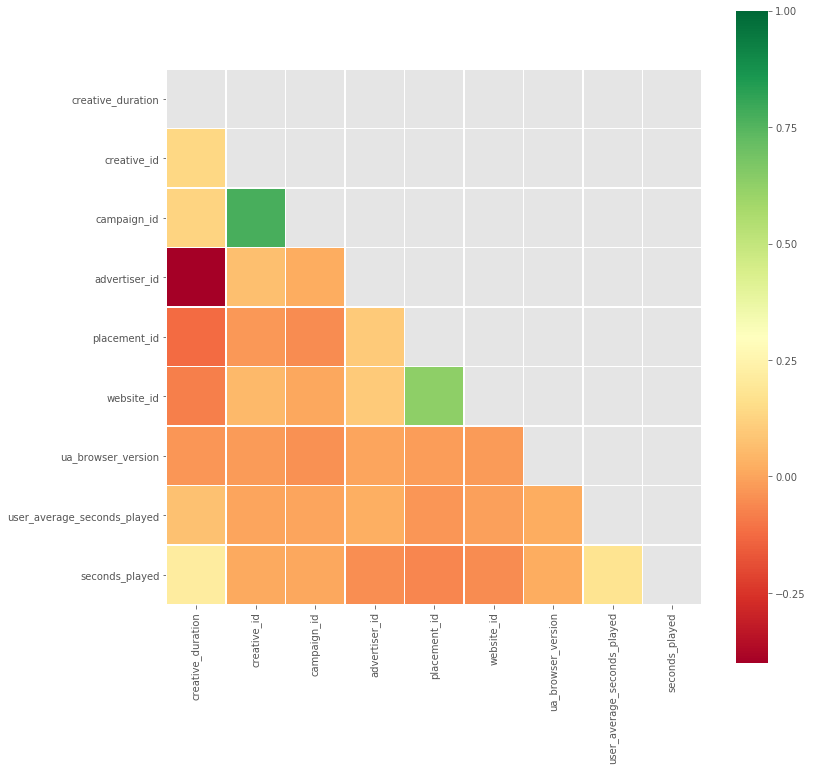

In [16]:
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap="RdYlGn",
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": 1}, ax=ax);

In [18]:
from collections import Counter

for col in df_train.columns:
    if pd.isnull(df_train[col]).values.any():
        print('NaNs in', col, df_train[col].dtypes)
        d = dict(Counter(pd.isnull(df_train[col])))
        nans = ( d[True] / (d[True] + d[False]) ) * 100
        print('Proportion of NaNs: %f %%' % ( nans))
        print('-----------------------------')

NaNs in advertiser_id float64
Proportion of NaNs: 1.381467 %
-----------------------------
NaNs in placement_language object
Proportion of NaNs: 0.006300 %
-----------------------------
NaNs in referer_deep_three object
Proportion of NaNs: 1.223233 %
-----------------------------
NaNs in ua_country object
Proportion of NaNs: 0.000467 %
-----------------------------
NaNs in ua_browser_version float64
Proportion of NaNs: 20.001333 %
-----------------------------
NaNs in ua_device object
Proportion of NaNs: 0.006600 %
-----------------------------
NaNs in user_average_seconds_played float64
Proportion of NaNs: 63.343167 %
-----------------------------


In [19]:
print('Number of entries when NaNs are kept: ',len(df_train))
print('Number of entries when all NaNs are dropped: ' ,len(df_train.dropna()))

Number of entries when NaNs are kept:  3000000
Number of entries when all NaNs are dropped:  926493


In [20]:
# Premier jet, tout remplacer par 0 
df_train = df_train.fillna(0)

In [25]:
# Replace the date format, expand into 3 columns year, month, day

df_train['Year'] = df_train['timestamp'].map(lambda x: x.year)
df_train['Month'] = df_train['timestamp'].map(lambda x: x.month)
df_train['Day'] = df_train['timestamp'].map(lambda x: x.day)
df_train['Hour'] = df_train['timestamp'].map(lambda x: x.hour)
df_train['minute'] = df_train['timestamp'].map(lambda x: x.minute)

df_test['Year'] = df_test['timestamp'].map(lambda x: x.year)
df_test['Month'] = df_test['timestamp'].map(lambda x: x.month)
df_test['Day'] = df_test['timestamp'].map(lambda x: x.day)
df_test['Hour'] = df_train['timestamp'].map(lambda x: x.hour)
df_test['minute'] = df_train['timestamp'].map(lambda x: x.minute)